# **Computer Infrastructure Assessment: FAANG Stock Analysis**

## Introduction

This notebook completes the four problems for the Computing Infrastructure module assessment. The tasks involve fetching real-time financial data for FAANG stocks (META, AAPL, AMZN, NFLX, GOOG) via the `yfinance` package, saving it, plotting closing prices, creating an executable script, and automating weekly runs. 

The key concepts are: data acquisition, scripting, visualisation, and automation using Python and GitHub Actions.

References are provided inline throughout this file.

**About yfinance**

[yfinance](https://algotrading101.com/learn/yfinance-guide/#:~:text=yfinance%20is%20a%20popular%20open,%2C%20bonds%2C%20currencies%20and%20cryptocurrencies.) is an open source python library used to access the financial data from [Yahoo Finance](https://finance.yahoo.com/).

Link for yfinance docs, for download: https://github.com/ranaroussi/yfinance


**What are the FAANG Stocks?**

[FAANG Stocks](#https://www.investopedia.com/terms/f/faang-stocks.asp) represent the stocks for five major American technology companies: Meta (formerly known as Facebook), Amazon, Apple, Netflix, and Alphabet (formarly known as Google).

These companies have a lot of influence on the stock market and are part of major indices like the S&P 500. 

## Problem 1: yFinance

Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:

  • Facebook (META)

  • Apple (AAPL)

  • Amazon (AMZN)

  • Netflix (NFLX)

  • Google (GOOG)


Save the data into a folder called data in the root of the repository using a filename with the format YYYYMMDD-HHmmss.csv 


In [ ]:
# Importing all libraries: Required to run cells in this notebook
import datetime as dt
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

### Downloading and saving the data into a designated folder

In [ ]:
# STEP 1: Write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks

# To handle file system operations
import os

# Defining the get_data() function to save files with timestamps
def get_data():

    tickers = ["META", "AAPL", "AMZN", "NFLX", "GOOG"]
    # Source: https://ranaroussi.github.io/yfinance/reference/yfinance.ticker_tickers.html

    df = yf.download(tickers, period='5d', interval='1h', auto_adjust=True) 
    
    # Ensure the 'data' directory exists
    if not os.path.exists('data'):      
        os.makedirs('data')
    
    # Get current timestamp
    now = dt.datetime.now()

# STEP 2: Save the data to a CSV file with a timestamped filename, into the data directory

    # Save the data to a CSV file with a timestamped filename
    filename = f'data/{now.strftime("%Y%m%d-%H%M%S")}.csv'
    df.to_csv(filename)
    print(f"Data saved to {filename}")
    
    return df

# Call the function to test it, by displaying the first few rows of the Dataframe
get_data().head()

# Source: Adapted from class lectures (Videos 32 to 36)
# Source: https://mostlypython.substack.com/p/exploring-data-efficiently-with-pandas
# Source: https://chat.deepseek.com/share/u1pfznt6q8qc2ui30h (Explanation in detail of the function)
# Source: https://www.geeksforgeeks.org/python/python-os-listdir-method/(OS library usage)
# Source: https://docs.python.org/3/library/os.html (OS library documentation)

[*********************100%***********************]  5 of 5 completed

Data saved to data/20251220-163004.csv


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-15 14:30:00+00:00  274.144989  223.029999  307.730011  641.054993   
2025-12-15 15:30:00+00:00  275.510010  224.389999  308.829987  650.545105   
2025-12-15 16:30:00+00:00  274.920013  222.544998  306.142609  650.309998   
2025-12-15 17:30:00+00:00  274.040009  222.375000  307.450012  650.219971   
2025-12-15 18:30:00+00:00  273.369995  223.222595  308.540009  651.219971   

Price                                       High                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
Datetime                                                                   
2025-12-15 14:30:00+00:00  94.004997  280.049988  227.500000  311.359985   
2025-12-15 15:30:00+00:00  94.430000  275.640411  224.389999  309.390015   
2025-12-15 16:30:00+00:00  94.000000  275.695007  224.500000  308.880005   
2025-12-15 17:30:00+00:00  93.644997  275.100006  223.080002  307.899994   
2025-12-15 18:30:00+00:00  93.959900  274.250000  223.434998  309.369995   

Price                                             ...        Open              \
Ticker                           META       NFLX  ...        AAPL        AMZN   
Datetime                                          ...                           
2025-12-15 14:30:00+00:00  649.650024  96.065002  ...  280.000000  227.000000   
2025-12-15 15:30:00+00:00  650.760010  94.559998  ...  274.170013  223.039993   
2025-12-15 16:30:00+00:00  651.390015  94.441002  ...  275.540009  224.440002   
2025-12-15 17:30:00+00:00  652.320007  94.230003  ...  274.924988  222.544998   
2025-12-15 18:30:00+00:00  652.159973  94.165001  ...  274.019989  222.380005   

Price                                                          Volume  \
Ticker                           GOOG        META       NFLX     AAPL   
Datetime                                                                
2025-12-15 14:30:00+00:00  310.625000  644.250000  96.000000  8113962   
2025-12-15 15:30:00+00:00  307.730011  640.929993  94.004997  3495538   
2025-12-15 16:30:00+00:00  308.839996  650.619995  94.430000  2136284   
2025-12-15 17:30:00+00:00  306.239990  650.369995  94.004997  1992688   
2025-12-15 18:30:00+00:00  307.444794  650.099976  93.644997  2430153   

Price                                                          
Ticker                        AMZN     GOOG     META     NFLX  
Datetime                                                       
2025-12-15 14:30:00+00:00  6475168  3980818  2264723  5610795  
2025-12-15 15:30:00+00:00  2713407  1244270  1317447  2675928  
2025-12-15 16:30:00+00:00  2914110  1951626   846923  2181275  
2025-12-15 17:30:00+00:00  2010556  1006522   647454  2296090  
2025-12-15 18:30:00+00:00  2315546  1034648   545846  1941943  

[5 rows x 25 columns]

## Problem 2: Plotting FAANG Closing Prices

Write a function called plot_data() that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks.


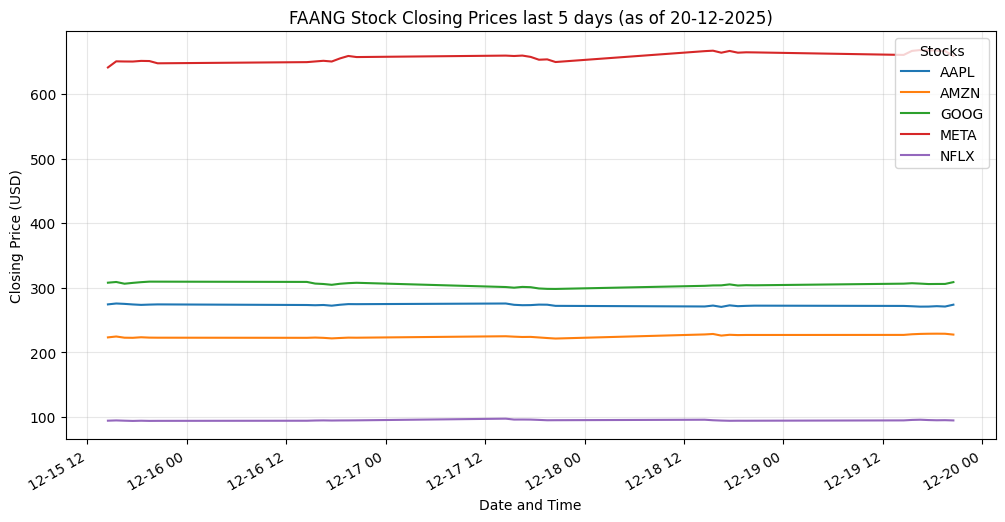

Plot saved to plots/20251220-174224.png


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-15 14:30:00+00:00  274.144989  223.029999  307.730011  641.054993   
2025-12-15 15:30:00+00:00  275.510010  224.389999  308.829987  650.545105   
2025-12-15 16:30:00+00:00  274.920013  222.544998  306.142609  650.309998   
2025-12-15 17:30:00+00:00  274.040009  222.375000  307.450012  650.219971   
2025-12-15 18:30:00+00:00  273.369995  223.222595  308.540009  651.219971   

Price                                       High                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
Datetime                                                                   
2025-12-15 14:30:00+00:00  94.004997  280.049988  227.500000  311.359985   
2025-12-15 15:30:00+00:00  94.430000  275.640411  224.389999  309.390015   
2025-12-15 16:30:00+00:00  94.000000  275.695007  224.500000  308.880005   
2025-12-15 17:30:00+00:00  93.644997  275.100006  223.080002  307.899994   
2025-12-15 18:30:00+00:00  93.959900  274.250000  223.434998  309.369995   

Price                                             ...        Open              \
Ticker                           META       NFLX  ...        AAPL        AMZN   
Datetime                                          ...                           
2025-12-15 14:30:00+00:00  649.650024  96.065002  ...  280.000000  227.000000   
2025-12-15 15:30:00+00:00  650.760010  94.559998  ...  274.170013  223.039993   
2025-12-15 16:30:00+00:00  651.390015  94.441002  ...  275.540009  224.440002   
2025-12-15 17:30:00+00:00  652.320007  94.230003  ...  274.924988  222.544998   
2025-12-15 18:30:00+00:00  652.159973  94.165001  ...  274.019989  222.380005   

Price                                                          Volume  \
Ticker                           GOOG        META       NFLX     AAPL   
Datetime                                                                
2025-12-15 14:30:00+00:00  310.625000  644.250000  96.000000  8113962   
2025-12-15 15:30:00+00:00  307.730011  640.929993  94.004997  3495538   
2025-12-15 16:30:00+00:00  308.839996  650.619995  94.430000  2136284   
2025-12-15 17:30:00+00:00  306.239990  650.369995  94.004997  1992688   
2025-12-15 18:30:00+00:00  307.444794  650.099976  93.644997  2430153   

Price                                                          
Ticker                        AMZN     GOOG     META     NFLX  
Datetime                                                       
2025-12-15 14:30:00+00:00  6475168  3980818  2264723  5610795  
2025-12-15 15:30:00+00:00  2713407  1244270  1317447  2675928  
2025-12-15 16:30:00+00:00  2914110  1951626   846923  2181275  
2025-12-15 17:30:00+00:00  2010556  1006522   647454  2296090  
2025-12-15 18:30:00+00:00  2315546  1034648   545846  1941943  

[5 rows x 25 columns]

In [ ]:
# STEP 1: Write a function called plot_data() that reads the latest CSV file from the 'data' directory

# The plot_data() function 
def plot_data():

    data_files = os.listdir('data') # List all files in the data directory
    data_files = [f for f in data_files if f.endswith('.csv')] # Filter, only include .csv files
    data_files.sort(reverse=True) # Sort files to get the latest one first
    latest_file = data_files[0] # Select the latest file
    
    # Read the latest data file into a DataFrame
    data = pd.read_csv(f'data/{latest_file}', header=[0, 1], index_col=0, parse_dates=True)

    # Ensure the plots directory exists
    if not os.path.exists('plots'):
        os.makedirs('plots')
    
    # Extract closing prices from the dataframe
    closing_data = data['Close']

# STEP 2: Create a line plot of the closing prices for each stock the selected period (5 days)
    
    # Plotting the closing prices
    now = dt.datetime.now()
    fig, ax = plt.subplots(figsize=(12, 6))
    closing_data.plot(ax=ax)
    
    ax.set_title(f'FAANG Stock Closing Prices last 5 days (as of {now.strftime("%d-%m-%Y")})')
    ax.set_xlabel('Date and Time')
    ax.set_ylabel('Closing Price (USD)')
    ax.grid(True, alpha=0.3)
    ax.legend(title='Stocks')
    
    plot_filename = f'plots/{now.strftime("%Y%m%d-%H%M%S")}.png'
    fig.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.show() 
    plt.close(fig)  # Used to close the figure after saving to free up memory
    print(f"Plot saved to {plot_filename}")
    
    return data

# Execute the function to generate the plot
plot_data().head()

# Source: https://matplotlib.org/stable/gallery/lines_bars_and_markers/line_plot.html

## Problem 3: Script Implementation

Explanation of all steps taken for this task.

#### 3.1 Created script with a shebang line

The Shebang Line: `#! /usr/bin/env python3`

The shebang is a special line at the beginning of a script that starts with the characters #!. It tells the system the path to the interpreter that should run the script's commands. Using a shebang lets us specify the script's language, run the script directly by typing something like `./faang.py `(instead of `python3 faang.py`), and makes scripts work reliably on other computers.

Source: [GeeksforGeeks](https://www.geeksforgeeks.org/linux-unix/using-shebang-in-linux/)


#### 3.2 Imported all Required Libraries

- [pandas](https://www.w3schools.com/python/pandas/pandas_intro.asp#:~:text=Pandas%20is%20a%20Python%20library,%2C%20exploring%2C%20and%20manipulating%20data.): Handles data and it is used for analysis

- [yfinance](https://www.geeksforgeeks.org/machine-learning/what-is-yfinance-library/): Downloads stock data from Yahoo Finance

- [datetime](https://docs.python.org/3/library/datetime.html): Handles dates and times, used for creating timestamped/ formatted filenames

- [matplotlib](https://matplotlib.org/): Creates visualisations, used for ploting the data



#### 3.3 Downloaded Stock Data with specific parameters

    df = yf.download(['META', 'AAPL','AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h', auto_adjust=True)

**- Selected Stocks:** FAANG stocks (META/Facebook, Apple, Amazon, Netflix, Google/Alphabet)

**- Period:** Last 5 days of data

**- Interval:** Hourly data

**- auto_adjust:** Automatically adjusts for stock splits and dividends

Source: [yfinance documentation](https://ranaroussi.github.io/yfinance/reference/yfinance.ticker_tickers.html)

#### 3.4 Making sure the directory exists

`if not os.path.exists('data'):` This checks if the directory named 'data' exists in the current working directory using os.path.exists.
    
`os.makedirs('data')`  If it doesn't exist, this  line (indented) will create it.


#### 3.5 Created Timestamp for Filenames

`now = dt.datetime.now()` Gets the current date and time and it is used to create timestamped filenames for both CSV and PNG files

#### 3.6 Saved Data to CSV File in data/ directory

    filename_csv = 'data/' + now.strftime('%Y%m%d-%H%M%S') + ".csv"
    df.to_csv(filename)

**Filename format:** Creates a filename, for example, data/20241219-143025.csv

**strftime formatting:**

 `%Y`: Year (4 digits)

 `%m`: Month (2 digits)

 `%d`: Day (2 digits)

 `%H`: Hour (24-hour format)

 `%M`: Minute

 `%S`: Second

Source: [Python.org](https://docs.python.org/3.6/library/datetime.html) and [W3Schools](https://www.w3schools.com/python/python_datetime.asp)

**Confirmation that data was saved**

`print(f"Data saved to {filename}")` Using an f-string (to insert the filename), this sends an output that confirms the requested data was saved


`return df` This returns the dataframe 'df' from the get_data() function, allowing it to be used in other parts of the script, if necessary


#### 3.7 Creating the plot_data() function

`def plot_data():` Definition of the function that will load the latest saved .csv file and create a plot

`data_files = os.listdir('data')` This lists all files/ directories in the 'data' folder and stores the list in data_files

`data_files = [f for f in data_files if f.endswith('.csv')]` Filters the `data_files` list to include only files that end with '.csv'

Source: [GeeksforGeeks - os.list dir()](http://geeksforgeeks.org/python/python-os-listdir-method/)

Source: [Naukri - endswith() Method](https://www.naukri.com/code360/library/python-string-endswith-method)

`data_files.sort(reverse=True)`

`latest_file = data_files[0]`

This sorts the filtered list of '.csv' files in descending order (newest first)

`data = pd.read_csv(f'data/{latest_file}', header=[0, 1], index_col=0, parse_dates=True)` This line reads the latest CSV file into a pandas dataframe ('data') using read_csv.

It specifies:

`header=[0, 1]` multi-level headers (so we can select 'Close')

`index_col=0` sets the first column as the index

`parse_dates=True` parses the index as dates

Source: [Dealing with Time Series Data — Pandas’ parse_dates Explained](https://medium.com/@chanakapinfo/dealing-with-time-series-data-pandas-parse-dates-explained-5d7b28aa0f78)


**Making sure the directory structure exists:**

`if not os.path.exists('plots'):`

`os.makedirs('plots')`

The two lines above check if the 'plots' directory exists. If not, we'll create it.


`closing_data = data['Close']` This extracts the data from the 'Close' Column, and stores it in `closing_data` (with dates as index and tickers as columns)

#### 3.8 Plotting the Data

Using matplotlib (`subplots`), we create and format the plot:

`fig, ax = plt.subplots(figsize=(12, 6))` Creates a new figure and axes for plotting (figure size of 12x6 inches)

`closing_data.plot(ax=ax)` Creates line plots for each stock's closing prices

`ax.set_title(f'FAANG Stock Closing Prices last 5 days (as of {now.strftime("%d-%m-%Y")})')` Creates a title for the plot (using an f-string and a formatted date for the retrival day)

`ax.set_xlabel('Date and Time') ` Sets the label for the x-axis to 'Date and Time'

`ax.set_ylabel('Closing Price (USD)')` Sets the label for the y-axis to 'Closing Price (USD)'

`ax.grid(True, alpha=0.3)` Adds a grid to the plot for better visibility (added transparency 'alpha=0.3' to avoid crowding the plot)

`ax.legend(title='Stocks')` Adds a legend to the plot ('Stocks') to identify the lines for each ticker

`plot_filename = f'plots/{now.strftime("%Y%m%d-%H%M%S")}.png'` Similar to the data filename, this creates a filename for the plot as a '.png', in the 'plots' directory

`fig.savefig(plot_filename, dpi=300, bbox_inches='tight')` This saves the PNG (plot file) with a high resolution (300 dots per inch), and no extra space (tight bounding box)

`plt.close(fig)` Closes the figure to free up memory and prevent it from displaying if running in unsuitable environment.

`print(f"Plot saved to {plot_filename}")` This prints a message confirming the created plot was saved in the correct directory

Source: [Matplotlib Documentation](https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html#:~:text=You%20do%20not%20need%20to,'%2C%20markersize%3D12)

Source: [DataCamp](https://www.datacamp.com/tutorial/line-plots-in-matplotlib-with-python)

**Executing the functions created in the document**


`if __name__ == "__main__":` check if the script is being run directly. If is does, the following lines execute `get_data()` to fetch and save the stock data,
and `plot_data()` to load the latest data, create the plot, and save it.

Source: [RealPython](https://realpython.com/if-name-main-python/)

#### 3.9 Terminal Commands: Making the Script Executable

After creating the `faang.py` file, we need to:

##### Step 1: Make the script executable

`chmod +x faang.py`

**chmod:** Changes file permissions

**+x:** Adds execute permission

**Result:** The file can now be run as `./faang.py`

##### Step 2: Verify permissions

`ls -l faang.py`

**Should show:** -rwxr-xr-x 1 user group ... faang.py

*The x in -rwxr-xr-x indicates the script is executable*


### 3.10 Running the Script

Method 1: Direct execution (requires permission)

`./faang.py`

Method 2: Using Python interpreter explicitly

`python3 faang.py`

### **Expected Output**

When we run the script successfully, this is what should happen:

1. The hourly data for FAANG stocks for the last 5 days is downloaded.

2. Two timestamped files are created:

    * CSV file in data/ directory (e.g., data/20241219_143025.csv)

    * PNG image in plots/ directory (e.g., plots/20241219_143025.png)

3. A plot window with the stock prices is displayed.

4. The plot is saved as a high-quality PNG file.

## Problem 4: Automation - Workflow & Triggers


### 4.1 Workflow Name
    
`textname: Run faang script and commit changes` This names the workflow, and describes the purpose of it.

It can be found in the GitHub Actions tab of the repository.

### 4.2 Trigger Events (on Section)

`on:` Specifies the events that trigger the workflow.

`schedule:` Indicates the workflow runs on a timed schedule

`cron: '00 05 * * 6'` This is a cron expression defining the schedule.

It breaks down as: 

`00`: Minute 0 (start of the hour)

`05`: Hour 5 (5:00 AM UTC).

`*`: Every day of the month.

`*`: Every month.

`6`: Day of the week 6 (Thursday, where 0=Sunday, 1=Monday, ..., 6=Saturday).

** *This workflow runs every Saturday at 5:00 AM UTC.*

`workflow_dispatch:` Allows manual triggering of the workflow from the GitHub UI (Actions tab). 

** *Simple manual run option. No parameters defined.*

### 4.3 Permissions

`permissions:` Specifies the permissions the workflow needs for the repository.

`contents: write:` Grants write access to the repository contents and necessary because the workflow commits and pushes changes back to the repo
(e.g., any files modified by the script).

### 4.4 Jobs

**Definition**

`jobs:` Defines the units of work in the workflow.

`run-script:` The name of this job (arbitrary, but descriptive).

`runs-on: ubuntu-latest` Specifies the runner environment. ubuntu-latest means the job runs on the latest version of Ubuntu Linux provided by GitHub's hosted runners (virtual machines).

**Step 1: The Core Actions / Job Steps**

`steps:` array lists the sequential actions in the job. 

Each step can be a pre-built action *via uses:* or a shell command *via run:*

`name: Checkout repository` Starts a new step with a descriptive name.

`uses: actions/checkout@v4` Uses the official checkout action (version 4) from GitHub. This checks out (downloads) the repository's code to the runner, allowing the workflow to access and modify files.

**Step 2: Set Up Python Environment**

`name: Set up Python` Descriptive name for this step.

`uses: actions/setup-python@v5` Uses the official setup-python action (version 5) from GitHub. This action installs and configures a Python environment on the runner.

`with:` Provides configuration parameters to the action.

`python-version: '3.x'` Specifies which Python version to install. '3.x' means it will use the latest stable Python 3 release available (e.g., 3.11, 3.12, etc.).
This step is necessary because the faang.py script requires Python to run, and we need to ensure the correct Python version is available on the runner.


**Step 3: Install Dependencies**

`run: |` Executes shell commands. The  allows multi-line commands.

`python -m pip install --upgrade pip` Upgrades pip (Python's package installer) to the latest version using Python's module runner.

`pip install -r requirements.txt` Installs Python packages listed in a `requirements.txt` file in the repository. This assumes the file exists and lists dependencies needed by `faang.py`

**Step 4: Run Script**
    
`name: Run faang.py` Step name.

`run: python faang.py` Executes the Python script `faang.py` using the installed Python environment. This assumes `faang.py` is in the repository root and performs the tasks.

**Step 5: Commit & Push Results**

`name: Commit and push changes` Step name.

`run: |` Multi-line shell commands for Git operations.

`git config user.name "github-actions[bot]"` Sets the Git commit author name to `"github-actions[bot]"` (a bot account for attribution).

`git config user.email "github-actions[bot]@users.noreply.github.com"` Sets the Git commit email to a no-reply GitHub address for the bot.

`git add .` Stages all changes in the current directory (adds modified or new files to the commit).

`git commit -m "Automated update from faang.py" || echo "No changes to commit": ` Commits the changes with a message. The `||` operator runs the echo command if the commit fails (for example, if there are no changes), preventing the step from erroring out.

`git push origin HEAD:main` Pushes the commit to the `main` branch of the remote repository *(origin)*. `HEAD:main` specifies pushing the current HEAD to the `main` branch.


Sources: 
Classes (Videos 38 to 40)

[GitHub Actions Documentation](https://docs.github.com/en/actions/tutorials/build-and-test-code/python)

[GitHub Actions](https://docs.github.com/en/actions/using-workflows/events-that-trigger-workflows#schedule)

*Code adapted from ChatGPT suggestion (see reference link inline through the code)*

### **Expected Output**

## Conclusion

The pipeline successfully downloads hourly FAANG stock data for the past 5 days, saves it with timestamps, and generates clear visualisations of closing prices. The executable script (`faang.py`) integrates both functions, and GitHub Actions automates weekly updates (running Saturdays at 5 AM UTC, with manual dispatch option).

Key learnings:
- Handling multi-index DataFrames from `yfinance`.
- Best practices for executable scripts (shebang, chmod).
- Cron scheduling and repository permissions in workflows.

Recent runs (visible in `data/` and `plots/`) confirm functionality with real market data.

## End
